In [5]:
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
%run ct_data.py '../crunchtope_model/results.nc' -c volume
%run pf_data.py '../pflotran_model/tremolite.h5'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Epidote', 'Zoisite', 'Chamosite-7A', 'Clinochlore-7A', 'Analcime', 'Anhydrite', 'Calcite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite-7A', 'Clinochlore-7A'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'serpentinites': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite']}
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite']
Primary mineral g

In [6]:
# Parameters
basecase = 4
time = 1000

In [7]:
def stack_plot(ax, ds, variable_groups, custom_cycler, crunchtope=False):
    import numpy as np

    variables = []
    for variable_group in variable_groups: 
        for minerals in variable_group.keys():
            if crunchtope:
                variables.extend([minerals])
                primary_minerals_vol_name = 'primary_minerals'
            else:
                variables.extend([minerals + "_VF"])
                primary_minerals_vol_name = 'primary_minerals' + "_VF"

    # Condition to sum over a part of the domain, based on another variable 'condition_var'
    # For example, let's sum where 'condition_var' is greater than a threshold value

    ax.set_prop_cycle(custom_cycler)
    
    threshold = 5
    condition = ds['percentage_alteration'].sel(time=time, method='nearest') > threshold

    if crunchtope:
        dims=['X', 'Z', 'Y']
    else:
        dims=['x', 'z', 'y']

    normalised = condition.sum(dim=dims)
    # Calculate the sum of each variable over the specified condition
    sums = {}
    for var in variables:
        sums[var] = ds[var].where(condition).sum(dim=dims) / ds[primary_minerals_vol_name].where(condition).isel(time=0).sum(dims) * 100 # Assuming 'x' and 'y' are spatial dimensions
        print(sums[var])

    # Convert the sums into a stack plot
    # Assuming 'time' is the dimension you want to plot over
    stack_data = np.vstack([sums[var].values for var in variables])
    ax.stackplot(ds['time'] / time, stack_data, labels=variables)

    return ax

<xarray.DataArray (time: 101)> Size: 808B
array([0.00049431, 0.00058208, 0.00065239, 0.00071687, 0.00077633,
       0.00083253, 0.00088645, 0.00093871, 0.00098961, 0.00103949,
       0.0010887 , 0.00113719, 0.00118505, 0.00123231, 0.00127913,
       0.00132546, 0.00137123, 0.00141645, 0.0014611 , 0.00150516,
       0.00154862, 0.00159153, 0.00163383, 0.00167556, 0.00171684,
       0.00175765, 0.00179806, 0.00183819, 0.0018781 , 0.00191789,
       0.00195764, 0.00199741, 0.00203719, 0.00207699, 0.00211684,
       0.00215669, 0.00219655, 0.00223642, 0.00227628, 0.00231614,
       0.00235601, 0.00239587, 0.00243574, 0.0024756 , 0.00251546,
       0.00255533, 0.00259521, 0.00263513, 0.00267492, 0.00271473,
       0.00275457, 0.00279441, 0.00283428, 0.00287414, 0.00291401,
       0.00295387, 0.00299373, 0.00303359, 0.00307345, 0.00311331,
       0.00315318, 0.00319304, 0.0032329 , 0.00327276, 0.00331262,
       0.00335248, 0.00339234, 0.0034322 , 0.00347206, 0.00351192,
       0.00355178, 0

KeyError: "No variable named 'inosilicates'. Variables on the dataset include ['X', 'Y', 'Z', 'Forsterite', 'Fayalite', ..., 'sulfates', 'carbonates', 'primary_minerals', 'secondary_minerals', 'percentage_alteration']"

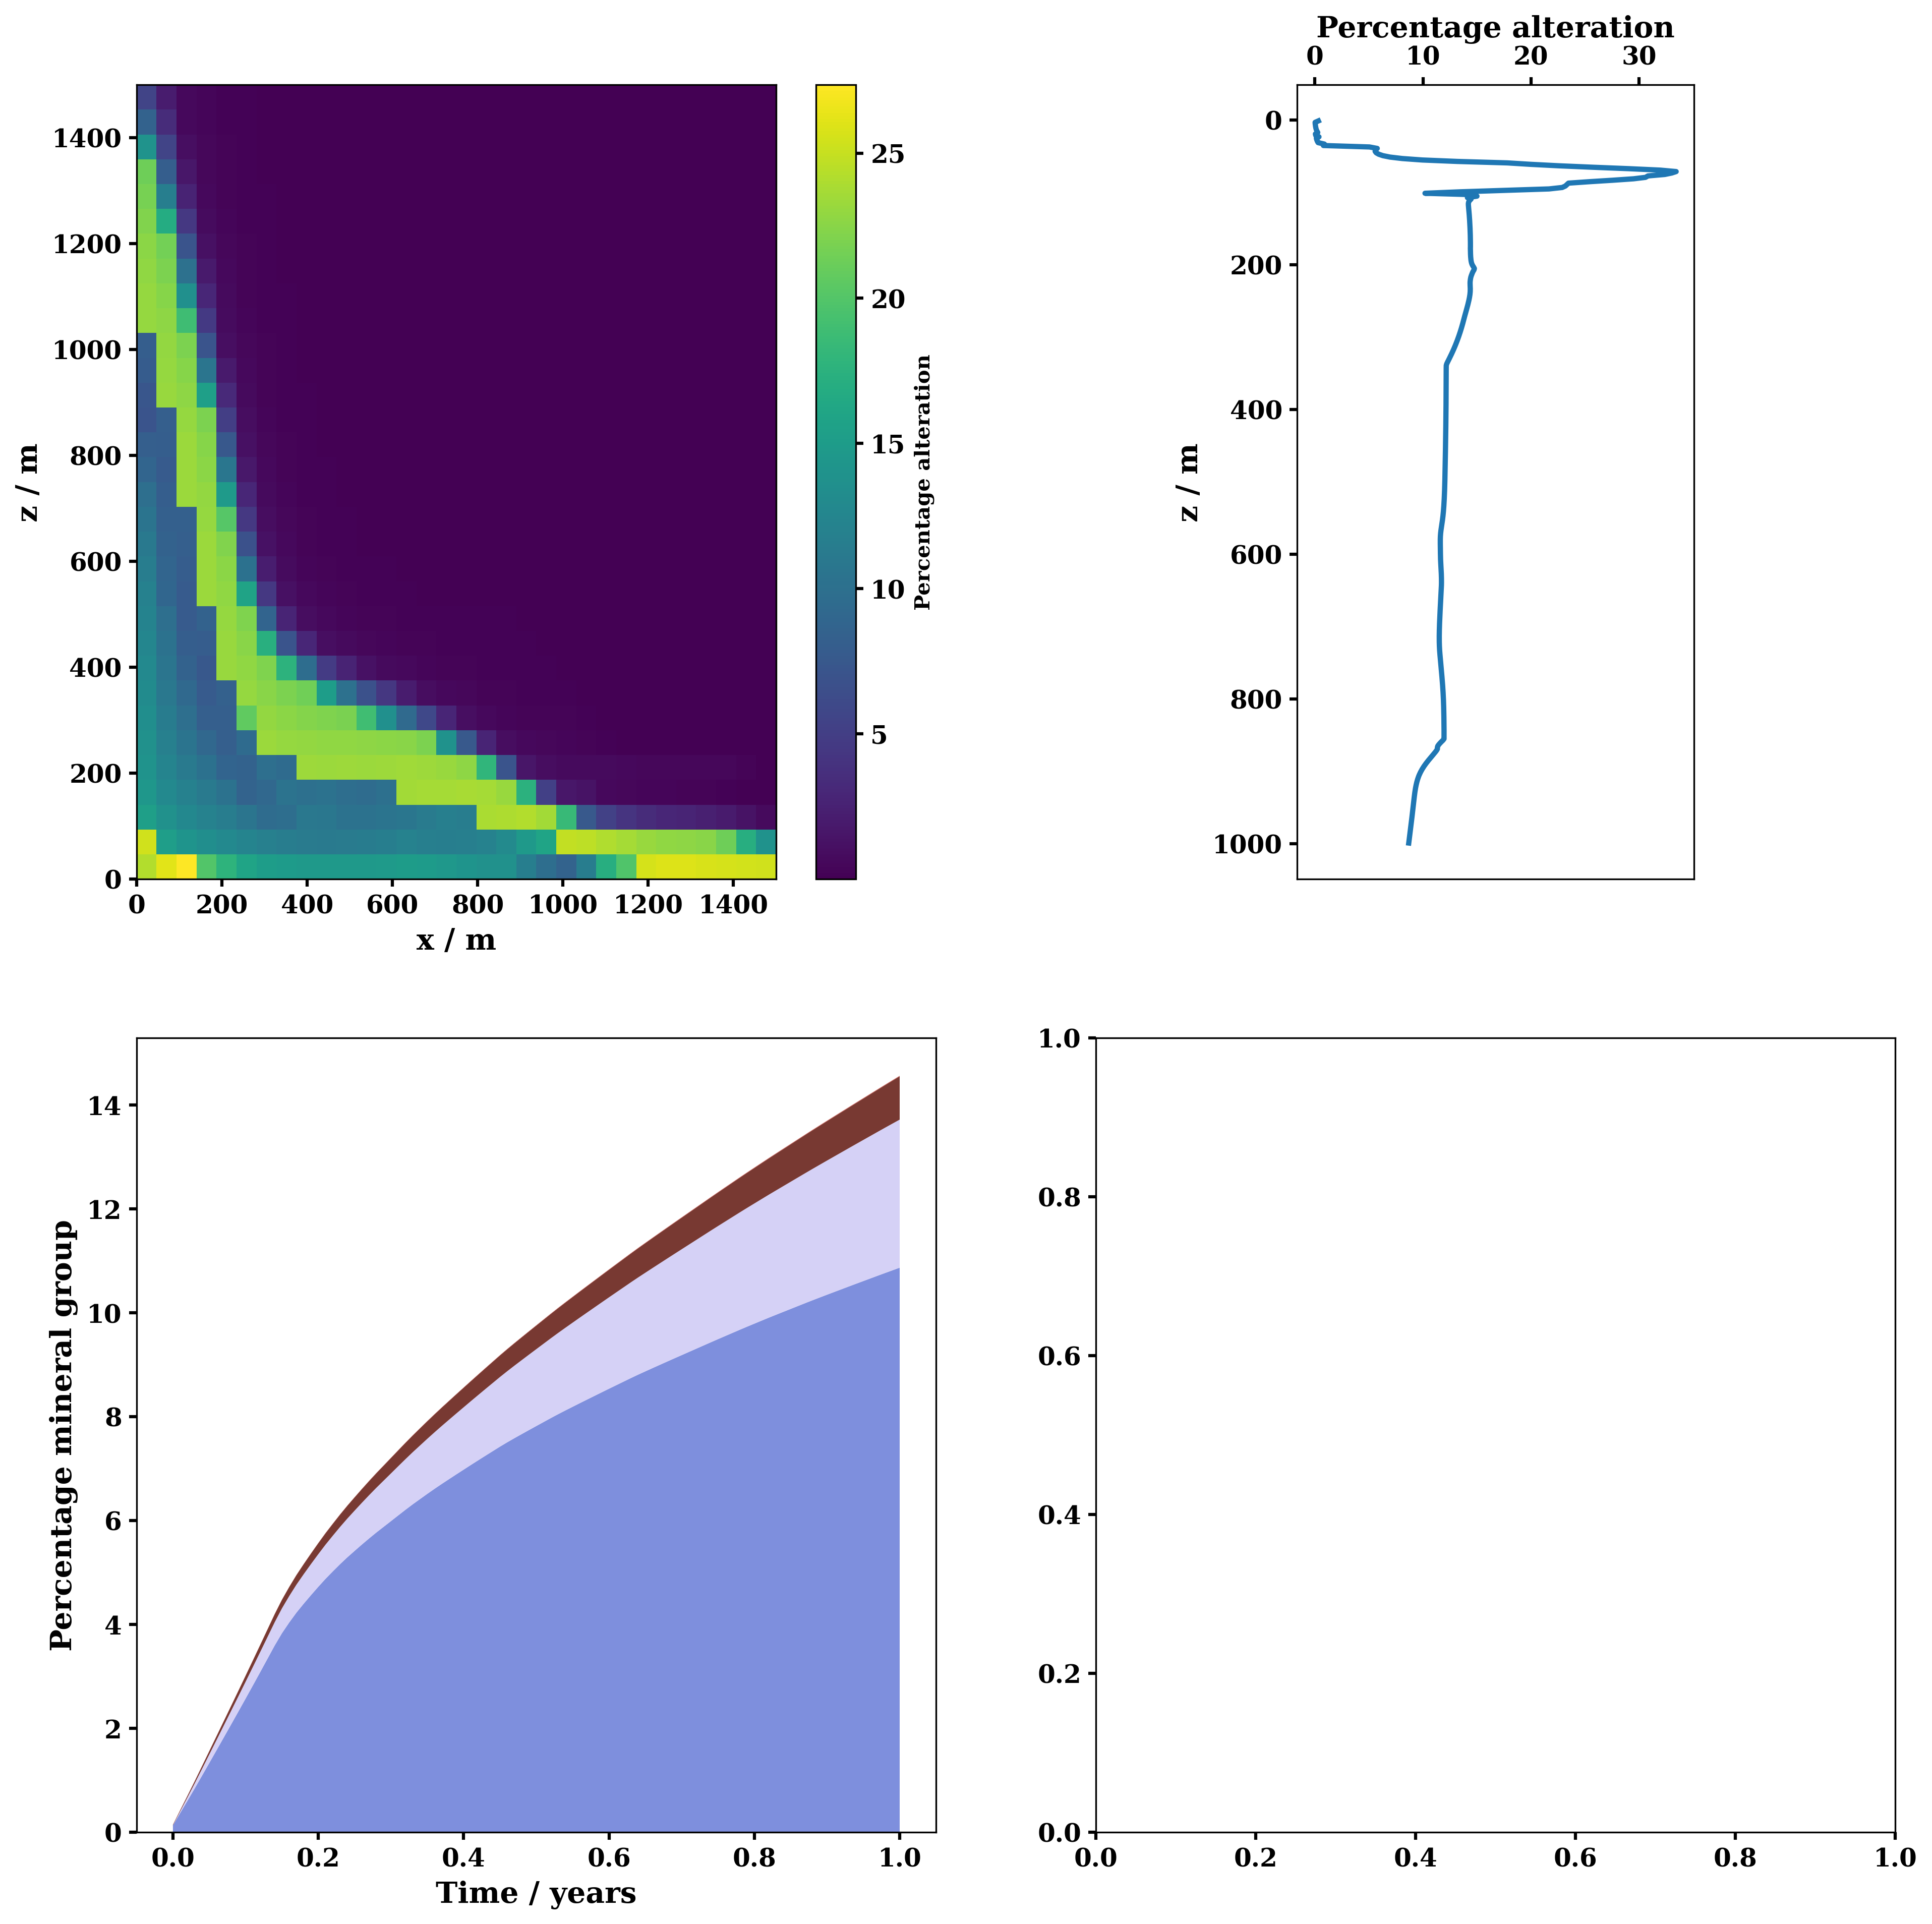

In [8]:
from matplotlib import pyplot as plt
from matplotlib import cycler
import numpy as np
plt.style.use('custom.mplstyle')
import figures as figs
fontsize = 14

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

# Select a sequential colormap from cmcrameri
# Define the number of groups (or layers) in the stack plot
# Extract colors from the colormap
colors_cool = cm.devon(np.linspace(0.2, 0.8, len(primary_mineral_groups)))
colors_hot = cm.lajolla(np.linspace(0.2, 0.8, len(secondary_mineral_groups)))  
colors = np.vstack((colors_cool, colors_hot))
# Create a custom color cycler using the extracted colors
custom_cycler = cycler(color=colors)

for axis in ax:
    condition = (pf_data['Temperature'] >= lower) & (pf_data['Temperature'] <= upper)
    stack_plot(axis, pf_data.where(condition), [secondary_mineral_groups], custom_cycler)
    axis.set_xlabel('Time / years', fontsize=fontsize)
    axis.set_ylabel('Percentage mineral group', fontsize=fontsize)

ax[3].legend(loc=6)

fig.tight_layout()
fig.show()